# Advanced Cluster Study

In this notebook I start by seeing if the clusters found using the minimal features are from tthe same device or not. This information will help us know whether the cluster is reliable or just identifying different devices. 

I will then be trying to find significant clusters using the comprehensive features. This involves using a covariance matrix and finding which features are most reliable to complete this. I will then be plotting these features against eachother to see how much it will help find significant clusters and features. 

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation

df = preprocessing.load_relevant_data()
minimum_features = feature_creation.extract_minimum_features(df)
comprehensive_features = feature_creation.extract_comprehensive_features(df)
kmeans_minimum,scaled_minimum = model_builder.kmeans_clustering(minimum_features)

y = kmeans_minimum.predict(scaled_minimum)

Feature Extraction: 100%|██████████| 30/30 [01:28<00:00,  2.94s/it]


Feature Extraction: 100%|██████████| 30/30 [00:03<00:00,  7.59it/s]


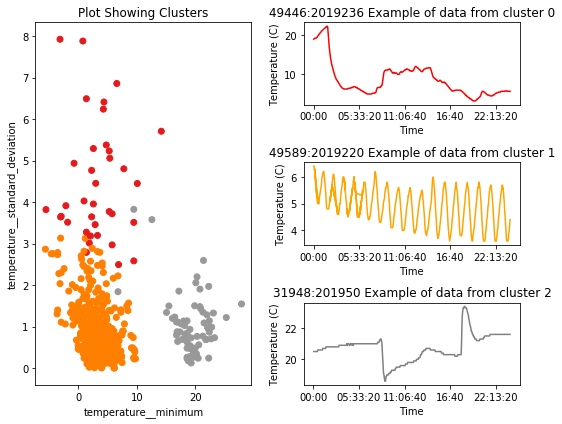

In [2]:
from medangel.visualization import viz_creation
viz_creation.create_multiple_figure(df)

In [3]:
cluster_0 = y == 0
cluster_1 = y == 1
cluster_2 = y == 2

# Looking into the clusters

Looking into  cluster 0 looks it like it is an anomaly for most devices since most device_ids have at least one occurence in this cluster

With cluster 2, we see that this cluster is larger than cluster 0 however there are only 7 different device ids in this group. we see that devices 31948 and 49486 are the ones that dominate cluster 2 in terms of repeated counts.

In [4]:
cluster_0_ids = pd.Series(minimum_features[cluster_0].index)
#for index in cluster_0_ids:
#    df[df["doy_id"] == index].plot(x="time",y="temperature", title = index)
cluster_0_ids.shape
cluster_0_split = cluster_0_ids.str.split(pat=":",expand = True)
cluster_0_split[0].value_counts()

(36,)

52049    6
52148    5
49589    4
31948    4
48790    4
49446    3
49444    2
59497    2
49465    1
59519    1
59396    1
49103    1
52040    1
49486    1
Name: 0, dtype: int64

In [5]:
cluster_2_ids = pd.Series(minimum_features[cluster_2].index)
#for index in cluster_2_ids:
#    df[df["doy_id"] == index].plot(x="time",y="temperature", title = index)
cluster_2_ids.shape
cluster_2_split = cluster_2_ids.str.split(pat=":",expand = True)
cluster_2_split[0].value_counts()

(76,)

31948    48
49486    19
48790     5
47683     1
52148     1
52049     1
49589     1
Name: 0, dtype: int64

In [6]:
y = kmeans_minimum.predict(scaled_minimum)
y=pd.Series(y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tsfresh import extract_features, extract_relevant_features, select_features

y.index = comprehensive_features.index

comprehensive_filtered = select_features(comprehensive_features, y, multiclass=True, n_significant=3)
comprehensive_filtered.shape

(1104, 60)

In [8]:
comprehensive_filtered

temperature__maximum  temperature__quantile__q_0.9  \
31948:2019100                   7.6                          7.40   
31948:2019101                   7.1                          6.80   
31948:2019102                   7.0                          6.60   
31948:2019103                   7.0                          6.60   
31948:2019104                   6.8                          6.60   
...                             ...                           ...   
59519:202011                    2.3                          2.20   
59519:202012                    3.2                          3.00   
59519:202013                    3.0                          2.79   
59519:202018                    4.5                          4.20   
59519:202019                    4.1                          3.80   

               temperature__c3__lag_1  temperature__c3__lag_2  \
31948:2019100              326.060727              326.004351   
31948:2019101              267.321954              267.040512   
31948:2019102              249.802881              249.522718   
31948:2019103              264.706327              264.461881   
31948:2019104              262.909848              262.680695   
...                               ...                     ...   
59519:202011                 3.354171                3.345039   
59519:202012                17.098451               17.100209   
59519:202013                14.702680               14.696637   
59519:202018                34.617852               34.554942   
59519:202019                14.006408               13.896978   

               temperature__c3__lag_3  temperature__quantile__q_0.8  \
31948:2019100              325.915256                          7.20   
31948:2019101              266.800745                          6.70   
31948:2019102              249.235503                          6.50   
31948:2019103              264.246706                          6.60   
31948:2019104              262.492149                          6.60   
...                               ...                           ...   
59519:202011                 3.334154                          2.00   
59519:202012                17.101011                          2.80   
59519:202013                14.687711                          2.60   
59519:202018                34.493856                          4.00   
59519:202019                13.771520                          2.12   

               temperature__root_mean_square  temperature__quantile__q_0.7  \
31948:2019100                       6.872935                           7.1   
31948:2019101                       6.437554                           6.6   
31948:2019102                       6.294889                           6.4   
31948:2019103                       6.419482                           6.5   
31948:2019104                       6.405462                           6.5   
...                                      ...                           ...   
59519:202011                        1.399787                           1.3   
59519:202012                        2.563460                           2.6   
59519:202013                        2.435777                           2.5   
59519:202018                        3.195504                           3.3   
59519:202019                        2.254884                           2.0   

               temperature__mean  temperature__quantile__q_0.6  ...  \
31948:2019100           6.863693                           7.0  ...   
31948:2019101           6.431809                           6.5  ...   
31948:2019102           6.290683                           6.3  ...   
31948:2019103           6.416598                           6.5  ...   
31948:2019104           6.403313                           6.5  ...   
...                          ...                           ...  ...   
59519:202011            1.303086                           1.1  ...   
59519:202012            2.550763               

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_comprehensive = scaler.fit_transform(comprehensive_filtered)
scaled_comprehensive_df = pd.DataFrame(scaled_comprehensive, columns = comprehensive_filtered.columns)
covMatrix_comp = pd.DataFrame.cov(scaled_comprehensive_df)

In [10]:
abs(covMatrix_comp).stack().idxmin()

('temperature__percentage_of_reoccurring_values_to_all_values',
 'temperature__lempel_ziv_complexity__bins_5')

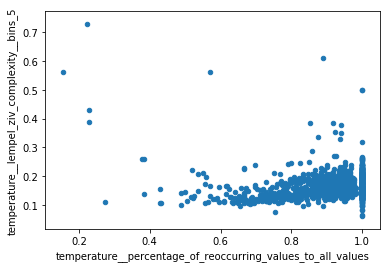

In [11]:
comprehensive_filtered.plot.scatter(x='temperature__percentage_of_reoccurring_values_to_all_values',y='temperature__lempel_ziv_complexity__bins_5')

In [12]:
covMatrix_comp.loc['temperature__percentage_of_reoccurring_values_to_all_values',
 'temperature__lempel_ziv_complexity__bins_5'] = 1
abs(covMatrix_comp).stack().idxmin()

('temperature__lempel_ziv_complexity__bins_5',
 'temperature__percentage_of_reoccurring_values_to_all_values')

In [13]:
covMatrix_comp.loc['temperature__lempel_ziv_complexity__bins_5','temperature__percentage_of_reoccurring_values_to_all_values'] = 1
abs(covMatrix_comp).stack().idxmin()

('temperature__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)',
 'temperature__lempel_ziv_complexity__bins_5')

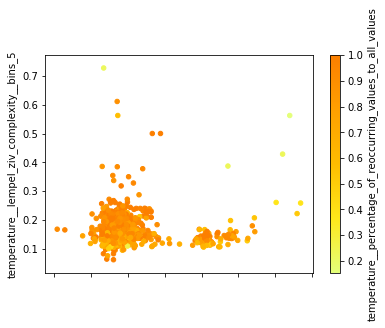

In [14]:
import matplotlib.cm as cm
comprehensive_filtered.plot.scatter(x='temperature__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)',y='temperature__lempel_ziv_complexity__bins_5', c = 'temperature__percentage_of_reoccurring_values_to_all_values', cmap = cm.Wistia)

In [15]:
covMatrix_comp.loc['temperature__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)',
                   'temperature__lempel_ziv_complexity__bins_5'] = 1
covMatrix_comp.loc['temperature__lempel_ziv_complexity__bins_5',
                   'temperature__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)'] = 1
abs(covMatrix_comp).stack().idxmin()

('temperature__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'temperature__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2')

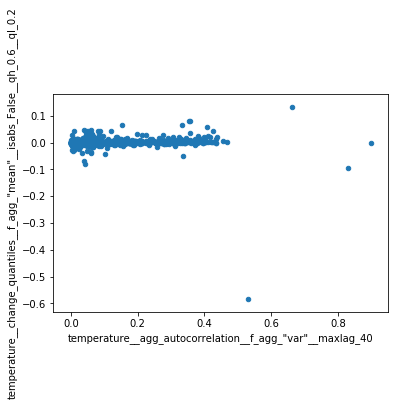

In [16]:
comprehensive_filtered.plot.scatter(x='temperature__agg_autocorrelation__f_agg_"var"__maxlag_40',y='temperature__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2')

# Principal Component Analysis

Here I use PCA and try to deduce whether the principal features extracted from the comprehensive features are useful or not. To do this I extracted the principal components and used Kmeans classifier.inertia_ to compare the different methods.

In [17]:
from sklearn.decomposition import PCA
import numpy as np

#X = np.array(comprehensive_filtered)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_comprehensive_df)
principalDf = pd.DataFrame(data = principal_components,
                          columns = ['principal component 1', 'principal component 2'])

In [18]:
len(pca.get_covariance())

60

In [19]:
pca_covariance = pd.DataFrame(pca.get_covariance(),
                              columns = comprehensive_filtered.columns,
                              index = comprehensive_filtered.columns)
pca_covariance

temperature__maximum  \
temperature__maximum                                            1.362349   
temperature__quantile__q_0.9                                    0.877590   
temperature__c3__lag_1                                          0.826159   
temperature__c3__lag_2                                          0.823805   
temperature__c3__lag_3                                          0.822370   
temperature__quantile__q_0.8                                    0.865484   
temperature__root_mean_square                                   0.867087   
temperature__quantile__q_0.7                                    0.859167   
temperature__mean                                               0.854248   
temperature__quantile__q_0.6                                    0.850688   
temperature__abs_energy                                         0.810978   
temperature__median                                             0.840639   
temperature__sum_of_reoccurring_values                          0.733860   
temperature__linear_trend__attr_"intercept"                     0.853840   
temperature__cwt_coefficients__coeff_2__w_2__wi...              0.867690   
temperature__cwt_coefficients__coeff_1__w_2__wi...              0.846375   
temperature__cwt_coefficients__coeff_2__w_5__wi...              0.835068   
temperature__cwt_coefficients__coeff_3__w_2__wi...              0.869357   
temperature__cwt_coefficients__coeff_1__w_5__wi...              0.739789   
temperature__cwt_coefficients__coeff_3__w_5__wi...              0.861166   
temperature__quantile__q_0.4                                    0.830921   
temperature__cwt_coefficients__coeff_3__w_10__w...              0.824053   
temperature__cwt_coefficients__coeff_2__w_10__w...              0.767205   
temperature__benford_correlation                                0.310328   
temperature__cwt_coefficients__coeff_1__w_10__w...              0.625020   
temperature__approximate_entropy__m_2__r_0.1                   -0.314321   
temperature__approximate_entropy__m_2__r_0.3                   -0.341018   
temperature__approximate_entropy__m_2__r_0.5                   -0.349243   
temperature__cid_ce__normalize_True                            -0.309688   
temperature__approximate_entropy__m_2__r_0.7                   -0.332957   
temperature__approximate_entropy__m_2__r_0.9                   -0.323306   
temperature__spkt_welch_density__coeff_2                        0.218742   
temperature__percentage_of_reoccurring_datapoin...             -0.343886   
temperature__fft_coefficient__attr_"abs"__coeff_1               0.337985   
temperature__fft_coefficient__attr_"abs"__coeff_2               0.352992   
temperature__percentage_of_reoccurring_values_t...             -0.358361   
temperature__standard_deviation                                 0.409335   
temperature__variance                                           0.343508   
temperature__variance_larger_than_standard_devi...              0.344687   
temperature__linear_trend__attr_"stderr"                        0.201203   
temperature__lempel_ziv_complexity__bins_5                     -0.096655   
temperature__ratio_value_number_to_time_series_...              0.373927   
temperature__fft_aggregated__aggtype_"centroid"                -0.236926   
temperature__lempel_ziv_complexity__bins_10                    -0.092403   
temperature__longest_strike_above_mean                          0.254158   
temperature__lempel_ziv_complexity__bins_3                     -0.026547   
temperature__agg_autocorrelation__f_agg_"median...              0.217713   
temperature__agg_autocorrelation__f_agg_"mean"_...              0.215849   
temperature__longest_strike_below_mean                          0.179345   
temperature__binned_entropy__max_bins_10                       -0.048925   
temperature__change_quantiles__f_agg_"mean"__is...             -0.251055   
temperature__augmented_dickey_fuller__attr_"use...             -0.208269   
temperature__agg_autocor

In [20]:

principalDf.head(5)

principal component 1  principal component 2
0              -0.526659              -0.105917
1              -1.747437               3.174094
2              -2.165566               3.920470
3              -2.164388               4.018060
4              -2.265412               4.742940

In [21]:
pca.explained_variance_ratio_

array([0.37531578, 0.14266659])

In the cell above we see that 2 features only explains about 50% of the variance which means we are missing alot of information from the original data.

In [22]:
#X = np.array(comprehensive_filtered)
pca_10 = PCA(n_components=10)
principal_components_10 = pca_10.fit_transform(scaled_comprehensive_df)
principalDf = pd.DataFrame(data = principal_components_10,
                          columns = pd.Series(range(1,11)).astype("str"))

pca_covariance_10 = pd.DataFrame(pca_10.get_covariance(),
                              columns = comprehensive_filtered.columns,
                              index = comprehensive_filtered.columns)
sum(pca_10.explained_variance_ratio_)
principalDf

0.8768318477244516

1         2         3         4         5         6         7  \
0    -0.526659 -0.105917 -1.083133  1.478006  0.161627  0.938432  0.203159   
1    -1.747437  3.174094 -2.384978 -0.160097 -1.939702  0.616444  0.191219   
2    -2.165566  3.920470 -2.930074 -0.860270 -1.411540 -0.124995  0.796829   
3    -2.164388  4.018060 -2.701239 -0.316560 -2.086587 -0.158363  1.025517   
4    -2.265412  4.742940 -2.639451 -0.369500 -2.336483 -0.483393  0.845227   
...        ...       ...       ...       ...       ...       ...       ...   
1099 -3.178438 -4.863457  1.986818  0.725207  0.246446 -1.036699  0.619844   
1100 -3.235649 -2.182625  0.396139  1.175055  0.690079  0.253712 -0.066802   
1101 -2.615972 -2.779719  0.864644  1.649656  0.758006 -0.113473  0.166862   
1102 -1.328635 -3.920902  1.582376  1.297217  1.314555 -0.264042 -0.311778   
1103 -2.256148 -3.580468  1.852103  0.678480  0.274053 -1.401142  1.079650   

             8         9        10  
0    -2.151251 -0.385589  0.407240  
1    -3.075204 -0.078064  0.639983  
2    -2.401833  0.234645  0.452727  
3    -1.867958 -0.572284  0.387047  
4    -0.397150 -0.819448 -0.006396  
...        ...       ...       ...  
1099  0.837230  1.553803  1.262848  
1100  0.528938  0.820039  0.029830  
1101  0.226395  0.251829  0.784514  
1102 -0.101910  0.941428  0.646480  
1103  1.422680  0.590039  1.063466  

[1104 rows x 10 columns]

In [23]:
pca_95 = PCA(.95)
principal_components_95 = pca_95.fit_transform(scaled_comprehensive_df)
#principalDf = pd.DataFrame(data = principal_components,
#                          columns = pd.Series(range(1,11)).astype("str"))

pca_covariance_95 = pd.DataFrame(pca_95.get_covariance(),
                              columns = comprehensive_filtered.columns,
                              index = comprehensive_filtered.columns)
sum(pca_95.explained_variance_ratio_)
#principalDf

0.9547315807378419

In [24]:
pca_95.n_components_

18

In [25]:
principalDf_95 = pd.DataFrame(data = principal_components_95,
                          columns = pd.Series(range(1,pca_95.n_components_ + 1)).astype("str"))

In [26]:
covMatrix95 = pd.DataFrame.cov(principalDf_95)
abs(covMatrix95).stack().idxmin()
covMatrix95

('11', '18')

1             2             3             4             5  \
1   2.253936e+01  5.330681e-16  3.543051e-16  2.536301e-15 -3.204851e-16   
2   5.330681e-16  8.567756e+00 -2.642794e-15 -1.151089e-15  3.000521e-16   
3   3.543051e-16 -2.642794e-15  7.609843e+00  1.221346e-15 -1.466541e-16   
4   2.536301e-15 -1.151089e-15  1.221346e-15  4.203483e+00 -6.540804e-16   
5  -3.204851e-16  3.000521e-16 -1.466541e-16 -6.540804e-16  2.395382e+00   
6   7.380014e-16 -7.770555e-16 -2.117778e-16 -1.187727e-17 -6.713679e-17   
7   1.875804e-15 -1.026679e-15  4.120810e-16  3.097150e-16 -5.281863e-16   
8   4.573757e-16  2.681445e-16  5.656803e-16  1.237048e-16  1.416214e-16   
9   1.268251e-16  3.261217e-16 -9.823914e-17 -1.620543e-16  4.252668e-18   
10  6.067475e-16  4.509337e-16 -6.274824e-16  3.073999e-16 -4.332688e-16   
11  9.562211e-17  4.219451e-16 -8.455008e-17 -1.071974e-17 -2.068457e-17   
12 -1.054863e-16  1.674897e-16 -1.811787e-16  4.368421e-17  1.723211e-16   
13  3.204851e-16  5.322629e-16 -6.925054e-17  1.425273e-16  6.019160e-17   
14 -3.563182e-17 -5.676934e-17  2.522411e-16 -2.284865e-17 -3.554123e-16   
15 -1.107203e-16  3.269270e-16 -3.269270e-16  1.506803e-16  2.679432e-16   
16  2.093621e-17  3.945670e-17  4.026194e-19  5.032743e-18 -1.056373e-16   
17  1.474594e-16  8.052388e-18 -3.744361e-17  1.142936e-16  9.417520e-17   
18  1.225976e-16  1.127334e-17 -2.235544e-16  8.772070e-17  1.785869e-16   

               6             7             8             9            10  \
1   7.380014e-16  1.875804e-15  4.573757e-16  1.268251e-16  6.067475e-16   
2  -7.770555e-16 -1.026679e-15  2.681445e-16  3.261217e-16  4.509337e-16   
3  -2.117778e-16  4.120810e-16  5.656803e-16 -9.823914e-17 -6.274824e-16   
4  -1.187727e-17  3.097150e-16  1.237048e-16 -1.620543e-16  3.073999e-16   
5  -6.713679e-17 -5.281863e-16  1.416214e-16  4.252668e-18 -4.332688e-16   
6   2.200172e+00  1.662818e-16  2.838467e-17 -2.691511e-16 -2.381494e-16   
7   1.662818e-16  1.656329e+00  1.944652e-16 -1.932573e-17 -2.007058e-16   
8   2.838467e-17  1.944652e-16  1.346692e+00  3.049842e-16  6.687508e-16   
9  -2.691511e-16 -1.932573e-17  3.049842e-16  1.139291e+00 -4.036260e-17   
10 -2.381494e-16 -2.007058e-16  6.687508e-16 -4.036260e-17  9.993002e-01   
11 -1.755421e-16  1.422253e-16 -3.417232e-16 -7.468590e-17 -8.968347e-17   
12 -5.837981e-18  1.457482e-16  1.544045e-16 -1.648726e-16 -1.205845e-16   
13 -3.301479e-17 -9.542080e-17 -5.999029e-17  3.472592e-16  4.509337e-16   
14 -2.037254e-16 -9.159592e-18 -2.000012e-16  1.396083e-16 -1.288382e-17   
15 -2.536502e-17 -2.650242e-16  9.642735e-17  2.412194e-16 -1.739316e-16   
16  1.264225e-16  4.690516e-17  3.255178e-16  1.157531e-17 -3.059908e-17   
17 -5.153528e-17  3.271283e-18 -1.226983e-16 -1.409671e-16  1.312539e-16   
18  2.405651e-16 -2.415716e-17  1.996992e-16  4.911957e-17 -2.512345e-16   

              11            12            13            14            15  \
1   9.562211e-17 -1.054863e-16  3.204851e-16 -3.563182e-17 -1.107203e-16   
2   4.219451e-16  1.674897e-16  5.322629e-16 -5.676934e-17  3.269270e-16   
3  -8.455008e-17 -1.811787e-16 -6.925054e-17  2.522411e-16 -3.269270e-16   
4  -1.071974e-17  4.368421e-17  1.425273e-16 -2.284865e-17  1.506803e-16   
5  -2.068457e-17  1.723211e-16  6.019160e-17 -3.554123e-16  2.679432e-16   
6  -1.755421e-16 -5.837981e-18 -3.301479e-17 -2.037254e-16 -2.536502e-17   
7   1.422253e-16  1.457482e-16 -9.542080e-17 -9.159592e-18 -2.650242e-16   
8  -3.417232e-16  1.544045e-16 -5.999029e-17 -2.000012e-16  9.642735e-17   
9  -7.468590e-17 -1.648726e-16  3.472592e-16  1.396083e-16  2.412194e-16   
10 -8.968347e-17 -1.205845e-16  4.509337e-16 -1.288382e-17 -1.739316e-16   
11  8.969772e-01  1.139413e-16  9.340770e-17 -3.929565e-16 -2.383507e-16   
12  1.139413e-16  7.537196e-01  1.932573e-16 -3.220955e-18 -3.993985e-16   
13  9.340770e-17  1.932573e-16  7.196051e-01  5.409192e-16 -4.167111e-17   
14 -3.929565e-16 -3.220955e-18  5.409192e-16  6.017269e-01  2

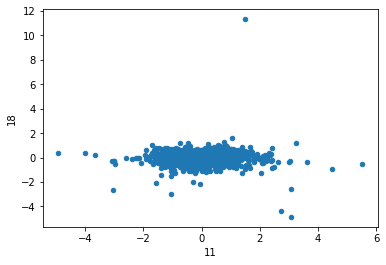

In [27]:
principalDf_95.plot.scatter(x = '11', y='18')

In [28]:
principalDf_95

1         2         3         4         5         6         7  \
0    -0.526659 -0.105917 -1.083133  1.478005  0.161622  0.938408  0.203079   
1    -1.747437  3.174094 -2.384978 -0.160105 -1.939627  0.616482  0.191013   
2    -2.165566  3.920470 -2.930073 -0.860270 -1.411518 -0.124960  0.797062   
3    -2.164388  4.018060 -2.701239 -0.316563 -2.086559 -0.158350  1.025463   
4    -2.265412  4.742940 -2.639451 -0.369503 -2.336486 -0.483447  0.845255   
...        ...       ...       ...       ...       ...       ...       ...   
1099 -3.178438 -4.863457  1.986817  0.725191  0.246595 -1.036598  0.619176   
1100 -3.235649 -2.182625  0.396139  1.175052  0.690136  0.253762 -0.066771   
1101 -2.615972 -2.779719  0.864645  1.649656  0.758030 -0.113437  0.166946   
1102 -1.328635 -3.920903  1.582376  1.297205  1.314652 -0.263992 -0.312195   
1103 -2.256148 -3.580468  1.852102  0.678479  0.274051 -1.401144  1.079455   

             8         9        10        11        12        13        14  \
0    -2.151311 -0.385199  0.407386  0.090773 -0.344791 -0.067232 -0.949440   
1    -3.074763 -0.077628  0.641220  0.649375 -0.548169 -0.164596 -0.956321   
2    -2.401469  0.234388  0.451661 -0.014690 -0.609500 -0.351663 -0.166693   
3    -1.867704 -0.572024  0.387284  0.226679 -0.833370 -0.682884 -0.215044   
4    -0.397082 -0.818669 -0.006510 -0.190810 -0.834281 -0.823489  0.305292   
...        ...       ...       ...       ...       ...       ...       ...   
1099  0.837800  1.554157  1.266712  1.713508  1.283734  1.882958  0.570682   
1100  0.529547  0.819881  0.029920  1.150287  0.022195  1.067053  1.230066   
1101  0.226785  0.251510  0.784093  1.107752  0.125809  0.759821  0.677960   
1102 -0.101519  0.941886  0.649061  1.006267  0.355360  0.904232  0.860675   
1103  1.422452  0.590271  1.064529  0.616986  1.122449  1.890939  0.423469   

            15        16        17        18  
0    -0.221336 -1.098045  0.545025  0.206436  
1     0.694157  0.116750 -0.446240  0.182992  
2     0.341094  0.419724  0.052743 -0.098649  
3     0.472908  0.017953 -0.144988  0.143300  
4     0.109190  0.004115  0.030958  0.376898  
...        ...       ...       ...       ...  
1099 -0.644855 -0.795615  0.708012  0.551708  
1100 -0.107415 -0.333038 -0.149002  0.412781  
1101  0.434807  1.543599 -0.131658 -0.063409  
1102 -0.436873 -0.323165  0.908891  0.578758  
1103 -0.786617 -1.330550 -0.351093 -0.471739  

[1104 rows x 18 columns]

In [29]:
# This may not be a fair comparison because of the number of features is different

kmeans_pca ,scaled_pca = model_builder.kmeans_clustering(principalDf_95)
kmeans_comprehensive, _ = model_builder.kmeans_clustering(comprehensive_features)
print("PCA Kmeans " + str(kmeans_pca.inertia_))
print("Minimum Features Kmeans " + str(kmeans_minimum.inertia_))
print("Comprehensive Features Kmeans " + str(kmeans_comprehensive.inertia_))

PCA Kmeans 17901.359281401914
Minimum Features Kmeans 2155.203865722028
Comprehensive Features Kmeans 224749.72414974932


Create a plot that shows (x = number of principal components, y = explained variance)
Use pca.transform to get coordinates of every sample in PCA space
pricinpal components are eigenvectors of the covariance matrix.
eigenvalue corresponds to the variance explained by eigenvectors

In [30]:
projected = pca_95.transform(scaled_comprehensive_df)

In [31]:
projected

array([[-0.52665896, -0.10591735, -1.08313344, ..., -1.09804545,
         0.54502482,  0.20643559],
       [-1.74743725,  3.17409371, -2.38497761, ...,  0.11675032,
        -0.44623993,  0.18299222],
       [-2.16556628,  3.92047032, -2.93007307, ...,  0.41972445,
         0.05274301, -0.09864921],
       ...,
       [-2.61597174, -2.77971901,  0.8646447 , ...,  1.54359879,
        -0.13165763, -0.06340883],
       [-1.32863535, -3.92090252,  1.58237586, ..., -0.32316463,
         0.90889141,  0.57875814],
       [-2.25614847, -3.58046783,  1.85210225, ..., -1.33055026,
        -0.35109349, -0.47173884]])

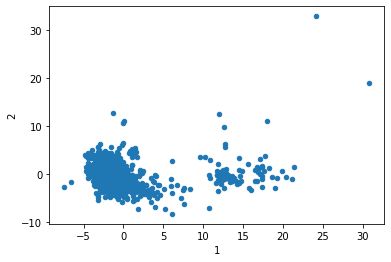

In [32]:
principalDf_95.plot.scatter(x="1",y="2")

look for clusters in the n-dimensional feature space give
use these plots and ask amin if he sees something that indicates a fridge might have a breakdown

whats the appropriate number of clusters?
what can i use other than Kmeans?
maybe create a 3d scatter plot
start looking into literature
Look at papers published by Amin

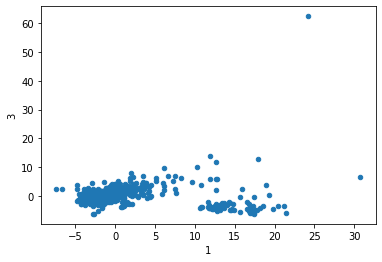

In [33]:
principalDf_95.plot.scatter(x="1",y="3")

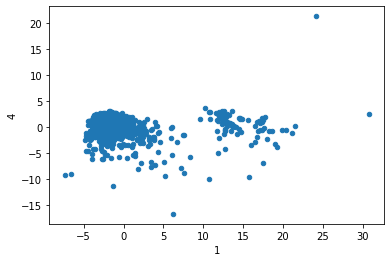

In [34]:
principalDf_95.plot.scatter(x="1",y="4")

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = principalDf_95['1']
y = principalDf_95['2']
z = principalDf_95['4']

ax.set_xlabel("Principal Variable 1")
ax.set_ylabel("Principal Variable 2")
ax.set_zlabel("Principal Variable 3")

ax.scatter(x, y, z)

plt.show()

Text(0.5, 0, 'Principal Variable 1')

Text(0.5, 0, 'Principal Variable 2')

Text(0.5, 0, 'Principal Variable 3')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')